In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn.utils import resample
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Using resampled dataset so that ratio of targets is equal

In [2]:
file = '../Resampling/FCV_Oversampled.csv'
df = pd.read_csv(file)

df

,Previous PHEVs,Previous BEVs,Previous HEVs,Previous CNGs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),Home Type (detached 1),Highest Level of Education,Longest trip in the last 12 months,...,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,Target,Model Year,Manufacturer,Model
0,0,0,0,0,125000.0,-2,1,1,3,571.75,...,15.58,2,55,0,3,10992,1.0,2013,4,4
1,0,0,1,0,225000.0,1,1,1,4,120.40,...,2.19,2,55,0,2,5714,1.0,2014,1,13
2,0,0,0,0,375000.0,2,1,1,3,407.45,...,40.95,5,45,0,2,16800,1.0,2013,9,6
3,0,0,1,0,275000.0,2,1,1,4,123.65,...,3.04,3,45,0,2,6000,1.0,2012,9,6
4,0,0,0,0,125000.0,0,1,1,4,289.51,...,47.75,2,65,0,2,14250,1.0,2014,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6629,0,0,1,0,275000.0,2,1,1,4,568.09,...,10.69,3,65,0,3,9197,0.0,2016,12,7
6630,0,0,1,0,225000.0,2,0,0,4,788.46,...,24.94,2,35,0,3,12800,0.0,2015,5,14
6631,0,0,0,0,225000.0,0,1,1,4,395.48,...,33.58,4,55,0,2,21600,0.0,2017,12,7
6632,0,0,0,0,75000.0,0,1,0,2,447.83,...,4.52,2,65,0,2,14880,0.0,2017,4,3


In [3]:
df['Target'].value_counts()

1.0    3317
0.0    3317
Name: Target, dtype: int64

#### Value counts in target column are equal, showing equal distribution of target values

In [4]:
ml_df = df.copy()

In [5]:
# Seperate training data from target column

X = ml_df.drop(columns=('Target'), axis = 1)
y = ml_df['Target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [7]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Create the SVM model
svm = SVC(kernel='linear')

In [9]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [10]:
# Generate dataframe of actual vs prediction

y_pred = svm.predict(X_test_scaled)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test,
}).reset_index(drop=True)
results

,Prediction,Actual
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
1986,0.0,0.0
1987,1.0,0.0
1988,1.0,1.0
1989,1.0,1.0


In [17]:
# Evaluate the model
ovr_accuracy_score = accuracy_score(y_test, y_pred)
ovr_accuracy_score

0.8427925665494727

In [63]:
# Stealing Christy's mettric score function ;)
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['BEV (0)', 'FCV (1)'], yticklabels=['BEV (0)', 'FCV (1)'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       976
         1.0       0.86      0.83      0.84      1015

    accuracy                           0.84      1991
   macro avg       0.84      0.84      0.84      1991
weighted avg       0.84      0.84      0.84      1991



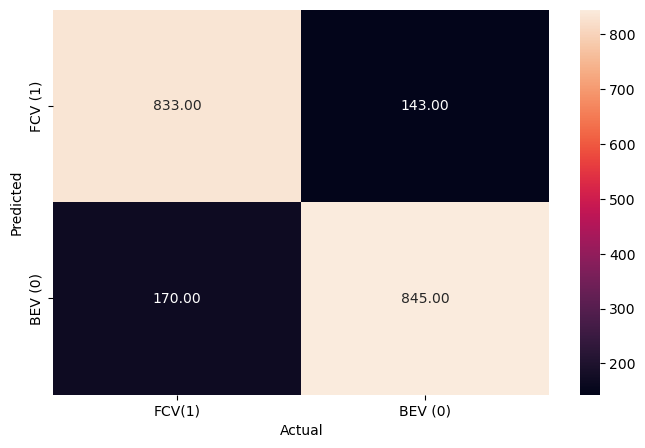

In [19]:
metrics_score(y_test, y_pred)

In [20]:
# Calculate feature importance on SVM Model

coef = svm.coef_
feature_importance = np.abs(coef)

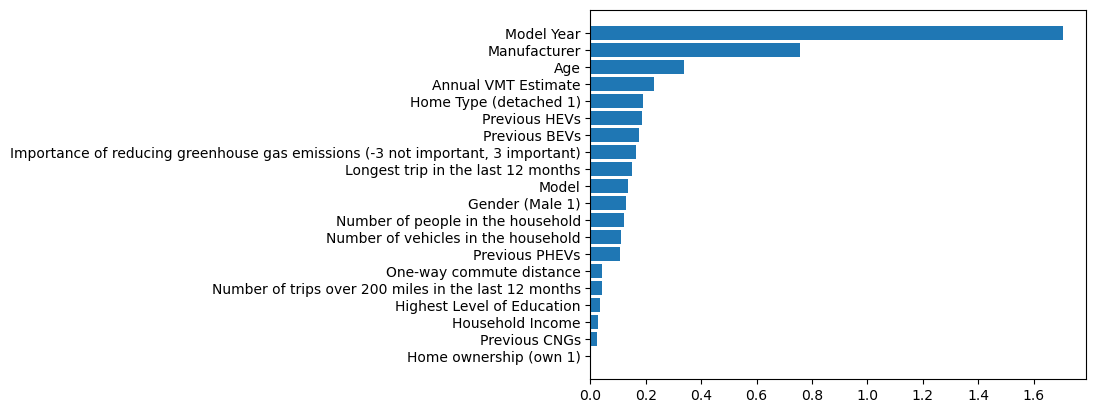

In [21]:
# Plot feature importance

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(feature_importance, list(X.columns))

# Testing on Weaker Data

* Plotting the feature importance shows that Manufacturer and Model Year are the best features for categorizing the data.
* In order to test the value of the other features, I am going to drop the Model Year columns and rerun the model.

In [22]:
data = ml_df.copy()
data = data.drop(columns=['Model Year'])

In [23]:
# Seperate training data from target column

X = data.drop(columns=('Target'), axis = 1)
y = data['Target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [25]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Create the SVM model
svm = SVC(kernel='linear')

In [27]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [28]:
accuracy_score(y_test, y_pred)

0.8427925665494727

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79       976
         1.0       0.80      0.77      0.79      1015

    accuracy                           0.79      1991
   macro avg       0.79      0.79      0.79      1991
weighted avg       0.79      0.79      0.79      1991



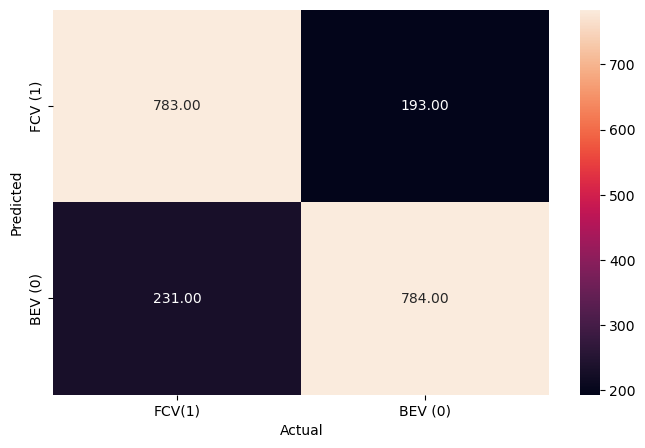

In [29]:
y_pred = svm.predict(X_test_scaled)
metrics_score(y_test, y_pred)

In [30]:
# Calculate feature importance on SVM Model

coef = svm.coef_
feature_importance = np.abs(coef)

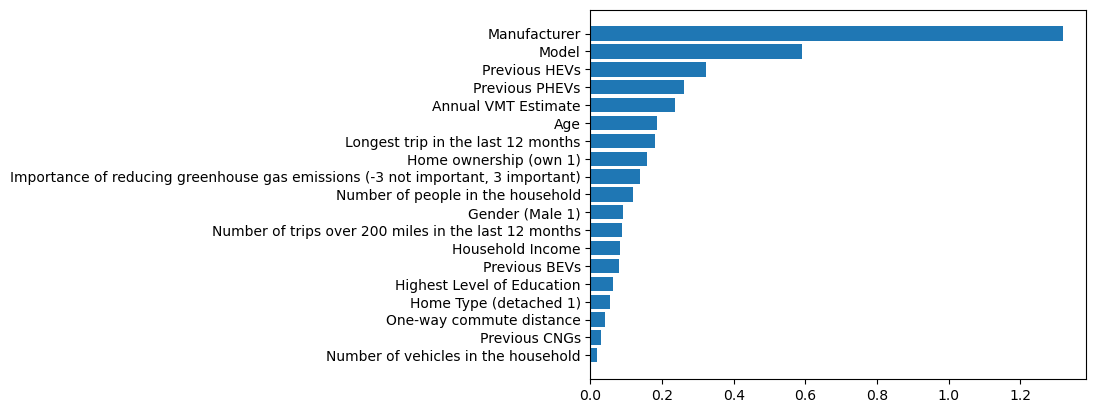

In [31]:
# Plot feature importance

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(feature_importance, list(X.columns))

## Now the feature importance shows that Manufacturer and Model are the best features for predicting the target; so once again I will remove them to test the model's accuracy on the weaker dataset

In [32]:
data = ml_df.copy()
data = data.drop(columns=['Manufacturer', 'Model', 'Model Year'])

In [33]:
# Seperate training data from target column

X = data.drop(columns=('Target'), axis = 1)
y = data['Target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [35]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Create the SVM model
svm = SVC(kernel='linear')

In [37]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [39]:
y_pred = svm.predict(X_test_scaled)
weak_accuracy_score = accuracy_score(y_test, y_pred)
weak_accuracy_score

0.634856855851331

              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63       976
         1.0       0.64      0.64      0.64      1015

    accuracy                           0.63      1991
   macro avg       0.63      0.63      0.63      1991
weighted avg       0.63      0.63      0.63      1991



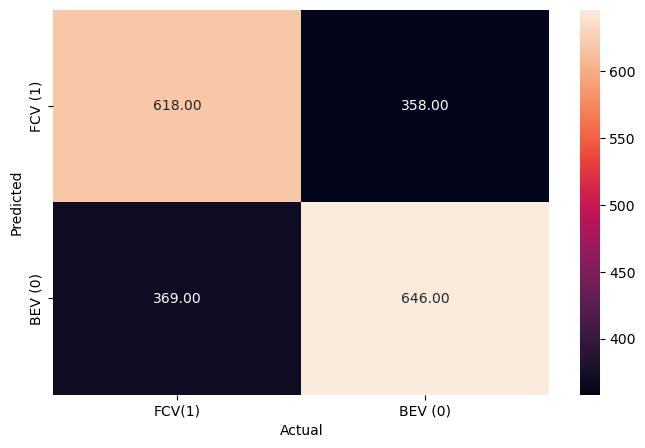

In [40]:
metrics_score(y_test, y_pred)

In [41]:
# Calculate feature importance on SVM Model

coef = svm.coef_
feature_importance = np.abs(coef)

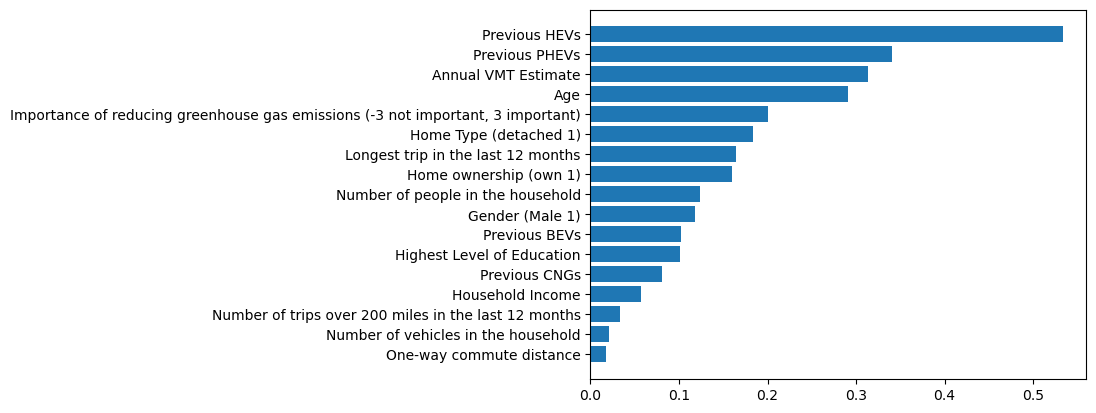

In [42]:
# Plot feature importance

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(feature_importance, list(X.columns))

In [43]:
data = ml_df.copy()

In [44]:
# Seperate training data from target column

X = data.drop(columns=('Target'), axis = 1)
X = X[['Manufacturer', 'Model', 'Model Year']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [45]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# Create the SVM model
svm = SVC(kernel='linear')

In [47]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [52]:
y_pred = svm.predict(X_test_scaled)
top_accuracy_score = accuracy_score(y_test, y_pred)
top_accuracy_score

0.8066298342541437

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       976
         1.0       0.84      0.76      0.80      1015

    accuracy                           0.81      1991
   macro avg       0.81      0.81      0.81      1991
weighted avg       0.81      0.81      0.81      1991



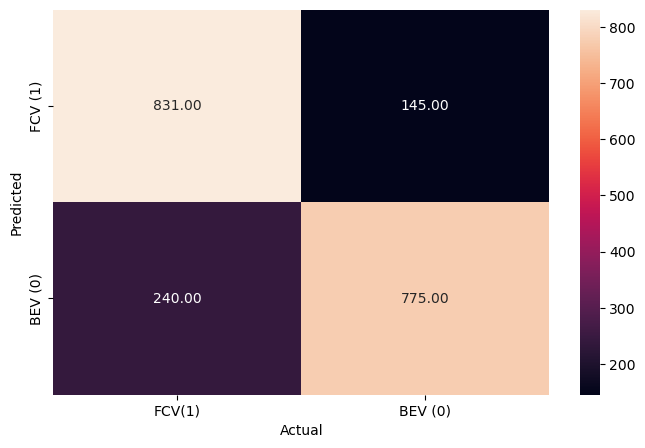

In [53]:
metrics_score(y_test, y_pred)

In [54]:
# Calculate feature importance on SVM Model

coef = svm.coef_
feature_importance = np.abs(coef)

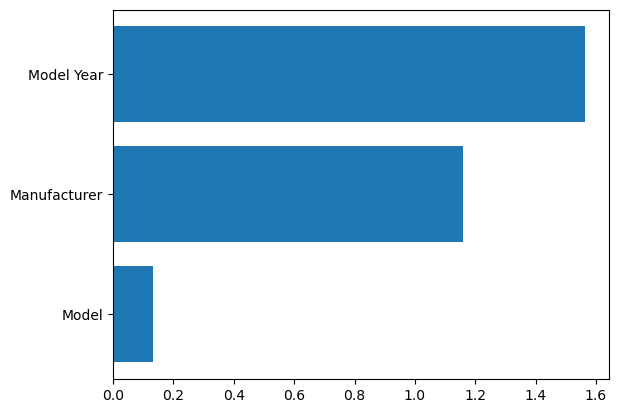

In [55]:
# Plot feature importance

def f_importances(coef, names):
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(feature_importance, list(X.columns))

### Overall Thoughts:

 - The Manufacturer, Model, and Model Year being the top features in determing the target make a lot of sense, after all most cars are only offered with one battery type
 - When the top features are removed the model still perfroms okay at about 63%
 - Using only the top 3 features yields higher accuracy than the rest of the dataset excluding the top 3


In [62]:


comparison_df = pd.DataFrame({'Data' : ['Overall Data', 'Weak Features', 'Best Features'],
                              'Accuracy' : [str(round(ovr_accuracy_score * 100, 1)) + '%',
                                            str(round(weak_accuracy_score * 100, 1)) + '%',
                                            str(round(top_accuracy_score * 100, 1)) + '%']})
comparison_df

,Data,Accuracy
0,Overall Data,84.3%
1,Weak Features,63.5%
2,Best Features,80.7%
